In [2]:
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import math
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from mpl_toolkits.mplot3d import Axes3D

warnings.filterwarnings("ignore")

sns.set(style="whitegrid")


In [3]:
df = pd.read_csv('/content/house.csv')


In [4]:
df = df.astype(int)

In [5]:
df.head()


,bedroom_count,net_sqm,center_distance,metro_distance,floor,age,price
0,1,26,1286,204,22,67,96004
1,1,34,1855,186,8,30,92473
2,1,36,692,111,24,24,98112
3,1,17,1399,237,1,66,92118
4,1,52,84,100,20,3,98976


In [6]:
df.tail()

,bedroom_count,net_sqm,center_distance,metro_distance,floor,age,price
4303,9,175,1299,217,2,5,102707
4304,6,215,1346,77,14,5,99695
4305,5,299,1585,235,3,5,93803
4306,1,29,1896,147,4,2,92914
4307,2,54,255,25,18,0,93743


In [6]:
print(df.shape)
df.info()

(4308, 7)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4308 entries, 0 to 4307
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   bedroom_count    4308 non-null   int64
 1   net_sqm          4308 non-null   int64
 2   center_distance  4308 non-null   int64
 3   metro_distance   4308 non-null   int64
 4   floor            4308 non-null   int64
 5   age              4308 non-null   int64
 6   price            4308 non-null   int64
dtypes: int64(7)
memory usage: 235.7 KB


In [9]:
df.describe()

,bedroom_count,net_sqm,center_distance,metro_distance,floor,age,price
count,4308.000000,4308.000000,4308.000000,4308.000000,4308.000000,4308.000000,4308.000000
mean,3.732823,118.438719,1090.055710,105.168756,9.397168,48.576834,95700.701950
std,2.476989,95.469676,555.330739,60.750787,7.517018,27.621465,3919.823101
min,1.000000,10.000000,11.000000,1.000000,1.000000,0.000000,86113.000000
25%,2.000000,52.000000,635.750000,56.000000,2.000000,25.000000,92933.750000
50%,3.000000,91.000000,1142.500000,101.000000,8.000000,48.000000,95337.000000
75%,5.000000,150.250000,1554.000000,148.000000,16.000000,72.000000,97980.000000
max,17.000000,750.000000,1999.000000,330.000000,24.000000,97.000000,118134.000000


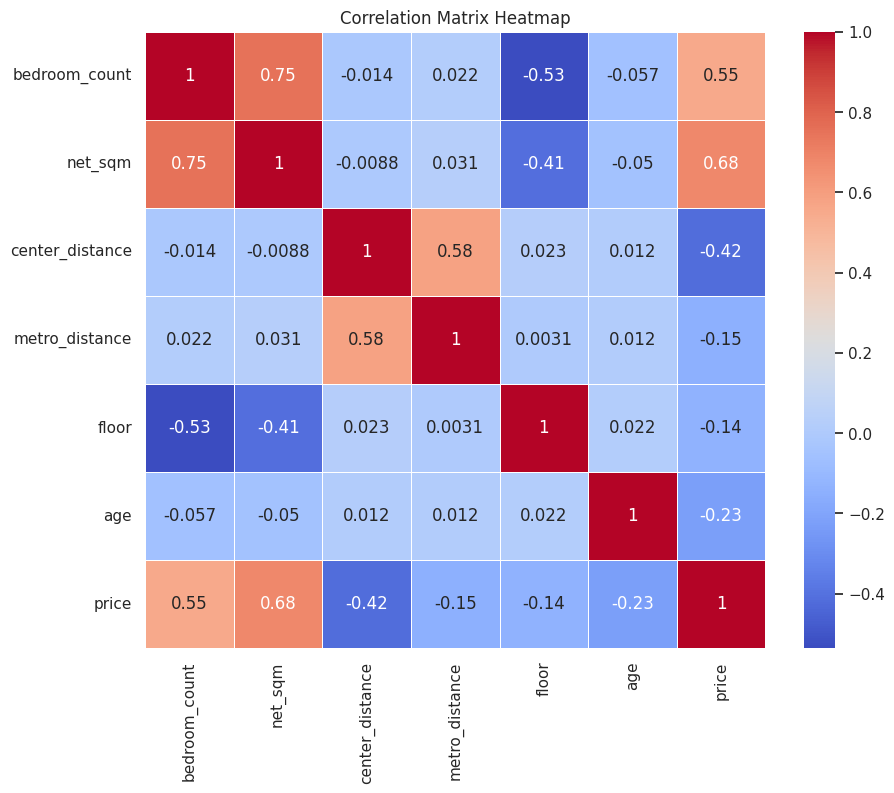

In [10]:
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Matrix Heatmap")
plt.show()

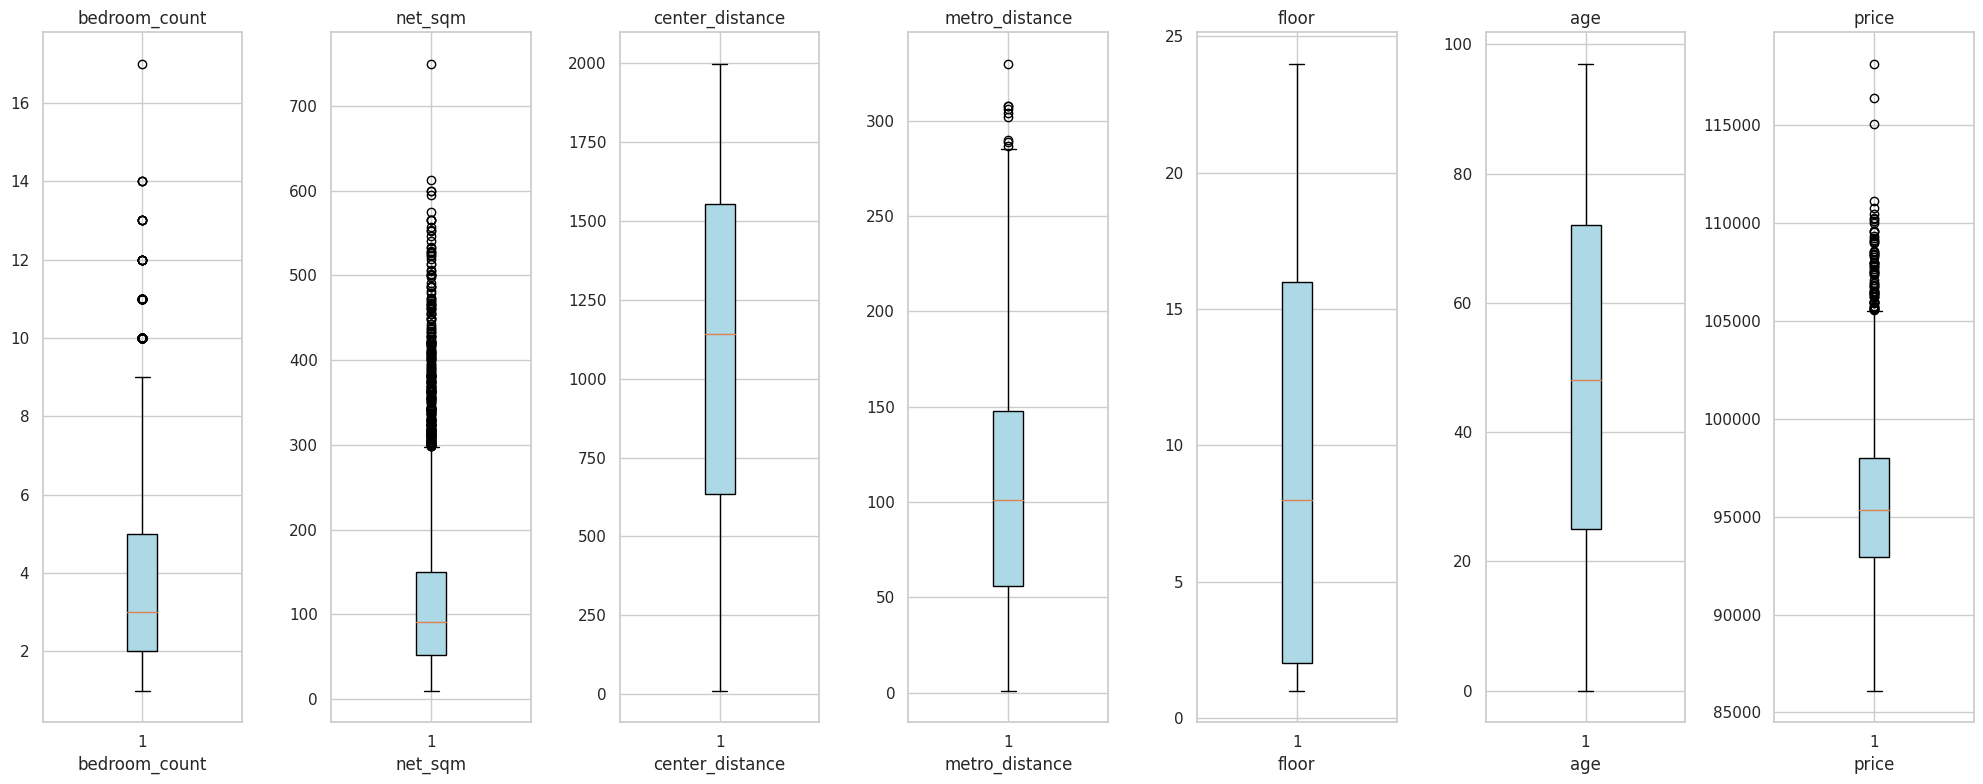

In [11]:
plt.figure(figsize=(20, 8))
for i, column in enumerate(df.columns):
    plt.subplot(1, len(df.columns), i + 1)
    plt.boxplot(df[column], vert=True, patch_artist=True, boxprops=dict(facecolor='lightblue'))
    plt.xlabel(column)
    plt.title(column)
plt.tight_layout()
plt.show()

In [12]:
column_name = 'price'
l = 0.05
h = 1 -l
Q1 = df[column_name].quantile(l)
Q3 = df[column_name].quantile(h)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


within_range_mask = (df[column_name] >= lower_bound) & (df[column_name] <= upper_bound)
df_within_range = df[within_range_mask]

num_removed_data_points = df.shape[0] - df_within_range.shape[0]
print( "\033[38;2;238;18;137m"+"Number of outlier data points:"+"\033[0m", num_removed_data_points)



Number of outlier data points: 0


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4308 entries, 0 to 4307
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   bedroom_count    4308 non-null   int64
 1   net_sqm          4308 non-null   int64
 2   center_distance  4308 non-null   int64
 3   metro_distance   4308 non-null   int64
 4   floor            4308 non-null   int64
 5   age              4308 non-null   int64
 6   price            4308 non-null   int64
dtypes: int64(7)
memory usage: 235.7 KB


# Linear Regression Model



In [8]:
y = df.price
X = df.drop(columns= ['price'])

In [9]:
from sklearn.preprocessing import StandardScaler

In [10]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=666)

In [12]:
MLR = LinearRegression()
MLR.fit(X_train, y_train)

LinearRegression()

In [13]:
from sklearn.metrics import mean_squared_error, r2_score

# Make predictions on the test data
y_pred = MLR.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
bold = "\033[1m"
reset = "\033[0m"

print(bold + "Mean Squared Error (MSE):" + reset, mse)
print(bold + "R-squared (R2):" + reset, r2)

Mean Squared Error (MSE): 5069410.992122812
R-squared (R2): 0.6959716737368451


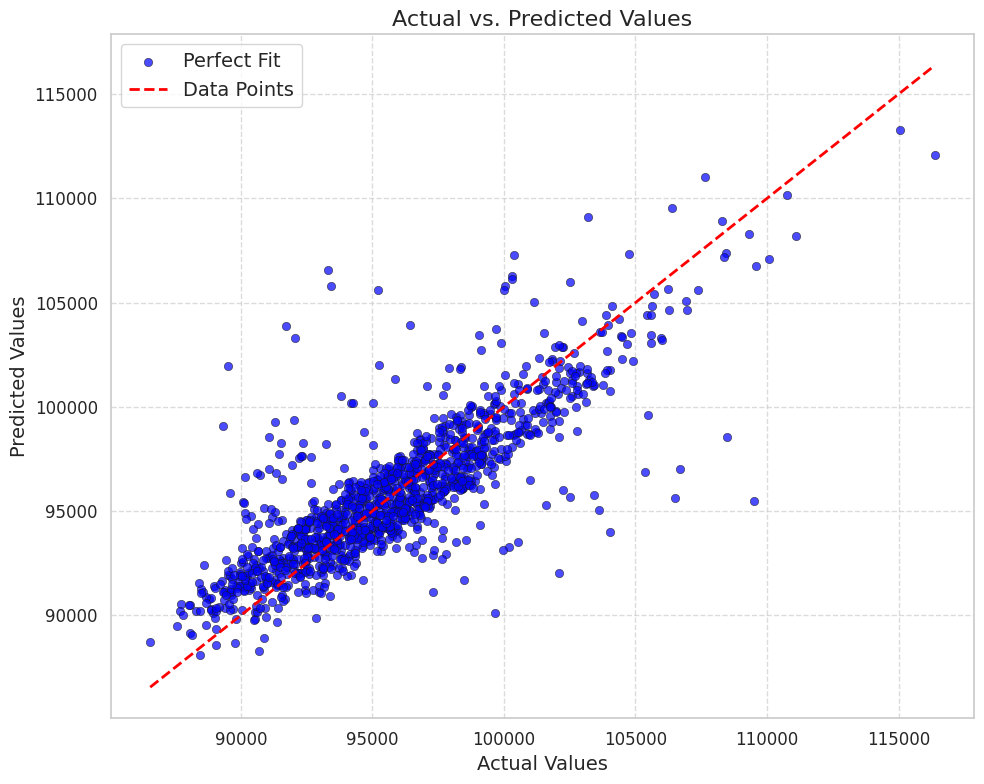

In [20]:
plt.figure(figsize=(10, 8))
plt.scatter(y_test, y_pred, color='blue', alpha=0.7, edgecolors='k', linewidths=0.5)

# Add a line representing a perfect fit (y_test = y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', lw=2, label='Perfect Fit')

plt.title('Actual vs. Predicted Values', fontsize=16)
plt.xlabel('Actual Values', fontsize=14)
plt.ylabel('Predicted Values', fontsize=14)
plt.legend(['Perfect Fit', 'Data Points'], loc='upper left', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [21]:
r2 = r2_score(y_test, y_pred)

# Number of predictors (features) in your model
num_predictors = X_train.shape[1]

# Number of data points in the test set
num_data_points = len(y_test)

# Calculate the adjusted R-squared
adjusted_r2 = 1 - ((1 - r2) * (num_data_points - 1) / (num_data_points - num_predictors - 1))

print(bold +"Regular R-squared:" +reset, r2)
print(bold +"Adjusted R-squared:"+reset, adjusted_r2)

Regular R-squared: 0.6959716737368451
Adjusted R-squared: 0.6945531900995364


# Random Forest Regression Model

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf_regressor = RandomForestRegressor(n_estimators=100)
rf_regressor.fit(X_train,y_train)


RandomForestRegressor()

In [ ]:
y_pred = rf_regressor.predict(X_test)


In [ ]:
error_score = metrics.r2_score(y_test, y_pred)
print("R squared error : ", error_score)

R squared error :  0.6816643046739166


In [ ]:
y_test_list = list(y_test)


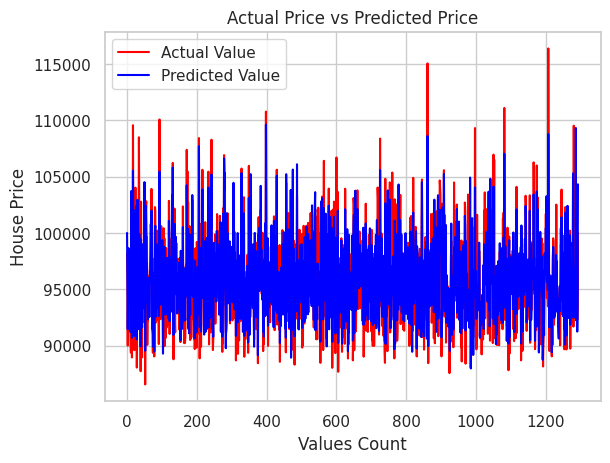

In [ ]:
plt.plot(y_test_list, color='red', label = 'Actual Value')
plt.plot(y_pred, color='blue', label='Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Values Count')
plt.ylabel('House Price')
plt.legend()
plt.show()

# Support Vector Regression Model

In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

In [15]:
X = df.drop('price', axis=1)
y = df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [16]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [17]:
model = SVR()
model.fit(X_train_scaled, y_train)

SVR()

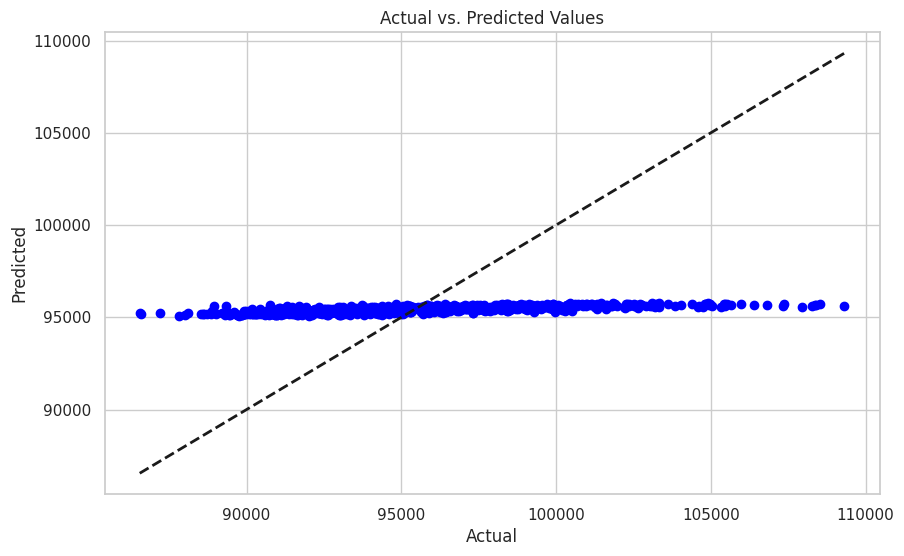

In [18]:
y_pred = model.predict(X_test_scaled)
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted Values')
plt.show()

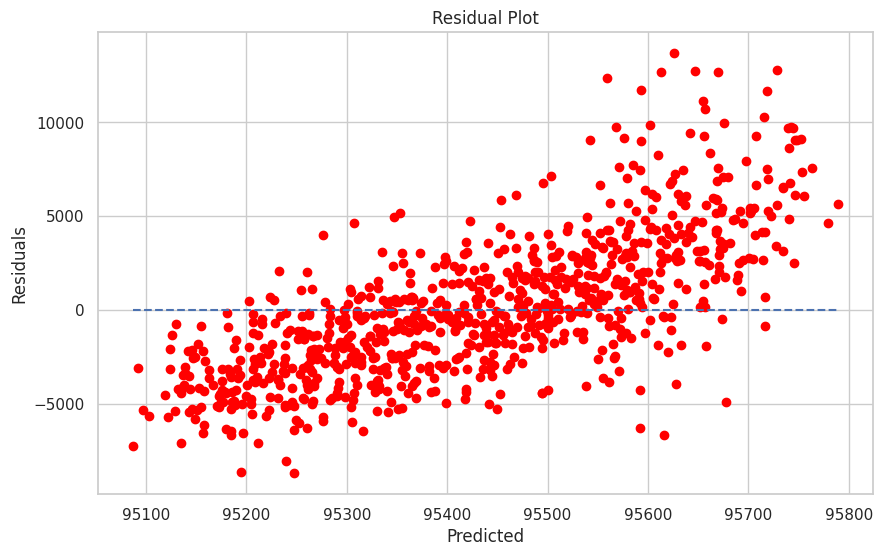

In [ ]:
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, color='red')
plt.hlines(y=0, xmin=y_pred.min(), xmax=y_pred.max(), linestyles='dashed')
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

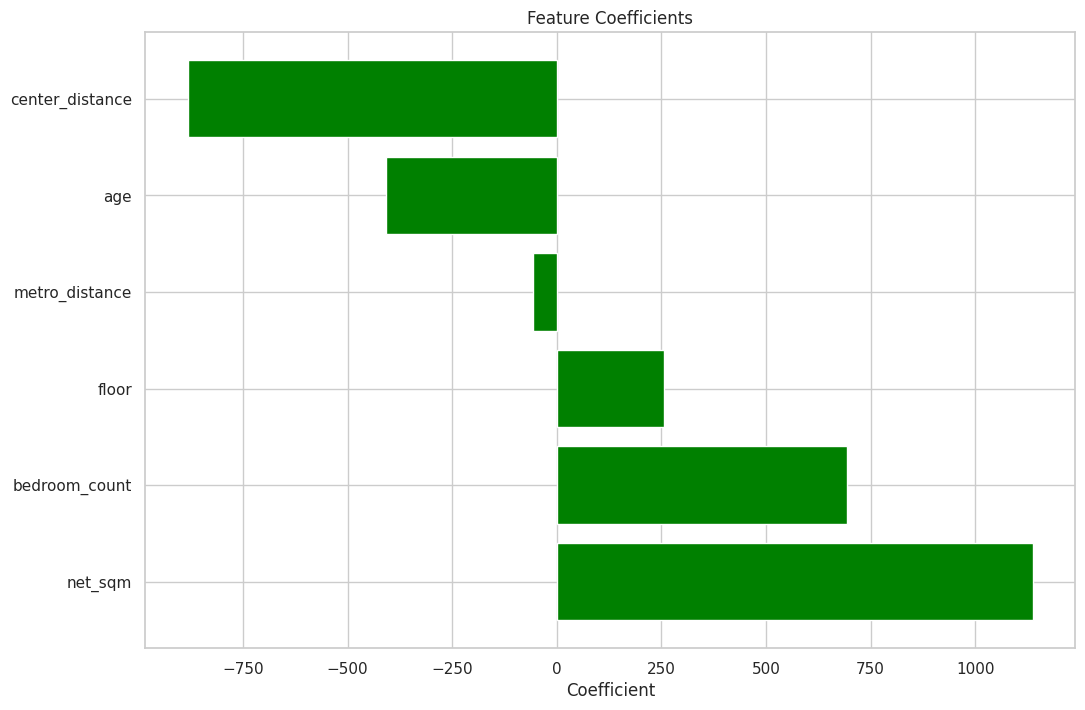

In [ ]:
model = SVR(kernel='linear')
model.fit(X_train_scaled, y_train)
coefficients = model.coef_.flatten()

coef_df = pd.DataFrame({'Feature': X.columns, 'Coefficient': coefficients})
plt.figure(figsize=(12, 8))
coef_df.sort_values(by='Coefficient', ascending=False, inplace=True)
plt.barh(coef_df['Feature'], coef_df['Coefficient'], color='green')
plt.xlabel('Coefficient')
plt.title('Feature Coefficients')
plt.show()